In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('top5_data_after_target_encoding_no_clustering.csv')
data

,Unnamed: 0,index,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),...,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,매칭구,평당가,평당가.1
0,0,0,5148.718800,8.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408,9647.193456,9647.193456
1,1,2,5148.718800,9.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408,9457.011996,9457.011996
2,2,3,5148.718800,10.0,2019.0,7187557.0,5327314.0,94.3,-4024.0,-1663.0,...,1187.44,9.01,1947.56,10.99,645.18,13.37,4557.982620,7236.162408,9922.827555,9922.827555
3,3,4,5148.718800,10.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408,8951.081313,8951.081313
4,4,5,5148.718800,24.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408,9768.698964,9768.698964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,14660,18324,4662.681663,26.0,2008.0,6911022.0,4483275.0,101.4,1630.0,-6739.0,...,1353.43,6.25,2293.61,6.41,695.33,3.37,5128.702256,4370.215888,3680.023030,3680.023030
14661,14661,18325,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,2453.348687,2453.348687
14662,14662,18326,4662.681663,33.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,3620.330546,3620.330546
14663,14663,18328,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,3306.957161,3306.957161


In [3]:
data = data.drop('Unnamed: 0', axis=1) #필요 없는 컬럼 제거

In [4]:
data

,index,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,매칭구,평당가,평당가.1
0,0,5148.718800,8.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408,9647.193456,9647.193456
1,2,5148.718800,9.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,7236.162408,9457.011996,9457.011996
2,3,5148.718800,10.0,2019.0,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,...,1187.44,9.01,1947.56,10.99,645.18,13.37,4557.982620,7236.162408,9922.827555,9922.827555
3,4,5148.718800,10.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408,8951.081313,8951.081313
4,5,5148.718800,24.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,7236.162408,9768.698964,9768.698964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,18324,4662.681663,26.0,2008.0,6911022.0,4483275.0,101.4,1630.0,-6739.0,14446.593,...,1353.43,6.25,2293.61,6.41,695.33,3.37,5128.702256,4370.215888,3680.023030,3680.023030
14661,18325,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,2453.348687,2453.348687
14662,18326,4662.681663,33.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,3620.330546,3620.330546
14663,18328,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,4370.215888,3306.957161,3306.957161


In [5]:
column_names = data.columns
print(column_names)

Index(['index', '아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '매칭구', '평당가', '평당가.1'],
      dtype='object')


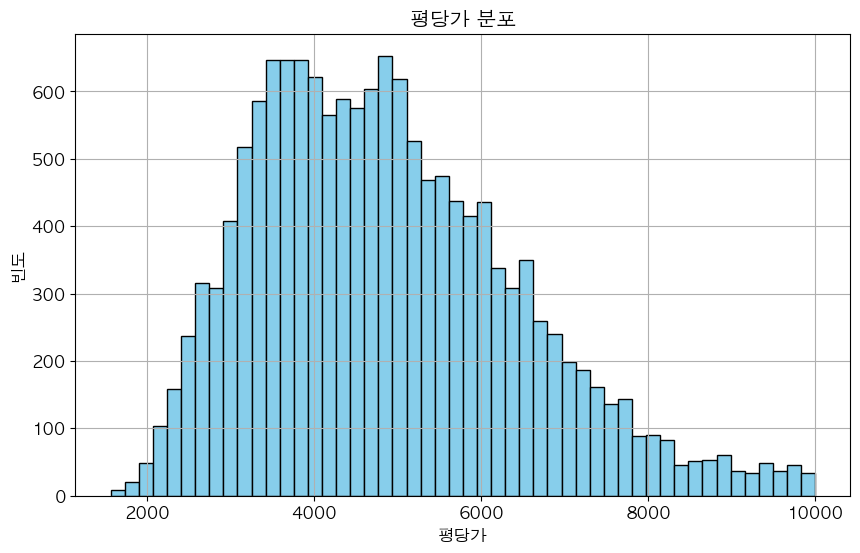

In [6]:
import matplotlib.pyplot as plt

# 폰트 설정 (맥 사용자를 위한 AppleGothic)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12  # 글씨 크기 조절
plt.rcParams['figure.figsize'] = [10, 6]  # 그래프 크기 조절

# 히스토그램 생성
plt.hist(data['평당가'], bins=50, color='skyblue', edgecolor='black')

# 레이블 및 타이틀 설정
plt.xlabel('평당가')
plt.ylabel('빈도')
plt.title('평당가 분포')

# 그리드 추가 (가독성 향상)
plt.grid(True)

# 그래프 표시
plt.show()

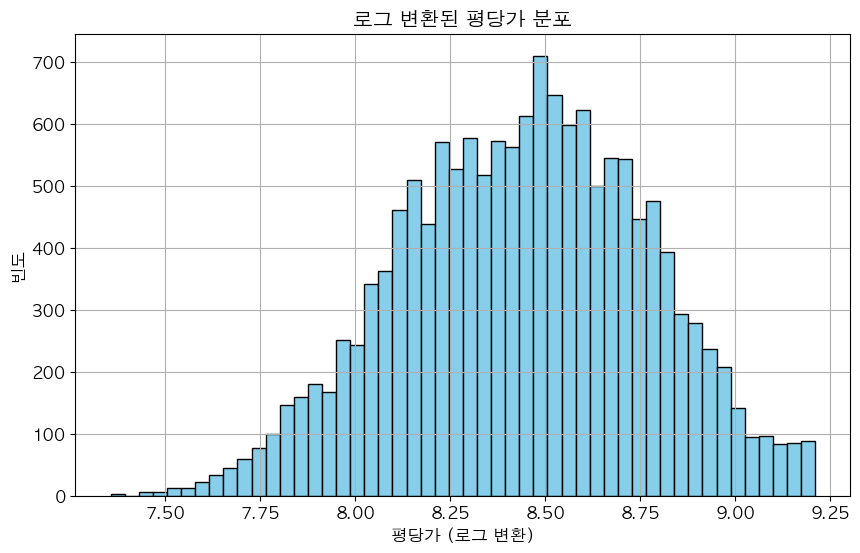

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 폰트 및 그래프 스타일 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [10, 6]

# '평당가' 열에 로그 변환 적용
data['평당가'] = np.log1p(data['평당가'])

# 로그 변환된 데이터의 히스토그램 시각화
plt.hist(data['평당가'], bins=50, color='skyblue', edgecolor='black')

# x축과 y축 레이블 설정
plt.xlabel('평당가 (로그 변환)')
plt.ylabel('빈도')

# 그래프 타이틀 설정
plt.title('로그 변환된 평당가 분포')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


In [8]:
plt.rcParams['font.family'] = 'AppleGothic' # 맥 사용자

cols = 

corr = data[cols].corr(method = 'pearson') #피어슨 상관계수를 구하는 것

fig = plt.figure(figsize = (40, 40)) #시각화
ax = fig.gca()

sns.set(font_scale=1.5) 
hm = sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols,xticklabels=cols,ax=ax,cmap="coolwarm")
plt.show()


SyntaxError: invalid syntax (2750873474.py, line 3)

In [9]:
# VIF Check
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 분석에 필요한 변수들을 선택 (타겟 변수 제외)
selected_columns = ['index', '아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '매칭구', '평당가', '평당가.1']

# 선택한 변수들로 데이터프레임 생성
df_selected = data[selected_columns]

# 데이터에 해당 컬럼들이 존재하는지 확인
if all(column in data.columns for column in selected_columns):
    # VIF 계산 함수
    def calculate_vif(data_frame):
        vif_data = pd.DataFrame()
        vif_data["Variable"] = data_frame.columns
        vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
        return vif_data

    # VIF 계산
    try:
        vif_result = calculate_vif(df_selected)
        # VIF가 높은 변수 확인
        high_vif_variables = vif_result[vif_result['VIF'] > 10]['Variable'].tolist()
        print(f'다중공산성이 높은 변수: {high_vif_variables}')
    except Exception as e:
        print(f"Error occurred during VIF calculation: {e}")
else:
    raise ValueError("Some selected columns are not in the data frame")


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


다중공산성이 높은 변수: ['건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close', 'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate', 'KRX300_close', 'KRX300_change_rate', 'KOSPI_close', 'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도', '평당가', '평당가.1']


VIF 사용: 층, 아파트브랜드, 클러스터링_구, 건축년도, 평당가

In [12]:
import pandas as pd

# 출력할 열 선택
selected_columns = ['아파트 브랜드', '층', '매칭구', '건축년도', '평당가']

# 선택된 열만 포함하는 데이터프레임 생성
data_selected_columns = data[selected_columns]

# 컬럼명 축약 (예시)
data_selected_columns.columns = ['브랜드', '층', '매칭구', '건축년도', '평당가']

# pandas 출력 옵션 설정
pd.set_option('display.float_format', '{:.2f}'.format)  # 소수점 두 자리까지 표시
pd.set_option('display.max_columns', len(selected_columns))  # 모든 열을 표시
pd.set_option('display.max_rows', 10)  # 출력할 최대 행 수

# 데이터프레임 스타일링 (예시)
styled = data_selected_columns.head().style.hide_index()
styled


/var/folders/3_/x71n0dfx597b2bmnkl6m82hm0000gn/T/ipykernel_75714/3111795918.py:18: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled = data_selected_columns.head().style.hide_index()


브랜드,층,매칭구,건축년도,평당가
5148.718800,8.000000,7236.162408,2019.000000,9.174526
5148.718800,9.000000,7236.162408,2019.000000,9.154617
5148.718800,10.000000,7236.162408,2019.000000,9.202694
5148.718800,10.000000,7236.162408,2019.000000,9.099641
5148.718800,24.000000,7236.162408,2019.000000,9.187041


In [13]:
import numpy as np
import pandas as pd

# 데이터 프레임이 정의되었는지 확인
if 'data' in locals():
    if isinstance(data, pd.DataFrame) and '평당가' in data.columns:
        # 상관 관계 행렬 생성
        correlation_matrix = data.corr()

        # '평당가'와 다른 변수들 간의 상관 관계의 절대값 계산 및 정렬
        correlation_with_target = correlation_matrix['평당가'].abs().sort_values(ascending=False)

        # 상관 관계 임계값 설정
        threshold = 0.9  # 예시로 임계값을 0.1로 설정

        # 임계값보다 높은 상관 관계를 가진 특성들 선택
        significant_features = correlation_with_target[correlation_with_target > threshold].index

        # 임계값과 선택된 중요한 특성들 출력
        print(f"상관 관계 임계값: {threshold}")
        print("상관 관계가 임계값 이상인 중요한 특성들:")
        for feature in significant_features:
            print(f"- {feature}")
    else:
        print("오류: 'data'는 pandas DataFrame이어야 하며 '평당가' 컬럼을 포함해야 합니다.")
else:
    print("오류: 'data' 데이터 프레임이 정의되지 않았습니다.")


상관 관계 임계값: 0.9
상관 관계가 임계값 이상인 중요한 특성들:
- 평당가
- 평당가.1


In [21]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# 데이터셋이 정의되었는지 확인
if 'data' in locals():
    if isinstance(data, pd.DataFrame) and '평당가' in data.columns:
        # 독립 변수(X)와 종속 변수(y) 설정
        X = data.drop(['평당가'], axis=1)
        y = data['평당가']

        # 선형 회귀 모델 생성 및 학습
        model = LinearRegression()
        model.fit(X, y)

        # 회귀 계수의 중요도 계산
        coef_importance = pd.Series(model.coef_, index=X.columns).abs().sort_values(ascending=False)

        # 회귀 계수의 중요도에 따른 임계값 설정
        threshold = 0.1  # 예시로 임계값을 0.1로 설정

        # 임계값보다 높은 중요도를 가진 특성들 선택
        significant_features_coef = coef_importance[coef_importance > threshold].index

        # 선택된 중요한 특성들 출력
        print("회귀 계수의 중요도가 임계값 이상인 특성들:")
        for feature in significant_features_coef:
            print(f"- {feature}")
    else:
        print("오류: 'data'는 pandas DataFrame이어야 하며 '평당가' 컬럼을 포함해야 합니다.")
else:
    print("오류: 'data' 데이터 프레임이 정의되지 않았습니다.")

회귀 계수의 중요도가 임계값 이상인 특성들:
- S&P 500_change_rate
- NASDAQ_change_rate
- DOW Jones_change_rate
- 경제활동인구_고용률(단위: %)
- 가계대출 (연리%)
- 매매가격지수(아파트)
- 주택매매가격지수(KB)_서울
- KOSPI_change_rate
- KRX300_change_rate
- 소비자물가지수_총지수(가중치:1000?)
- 소비자물가지수 총지수 
- 소비자물가지수 주택, 수도, 전기 및 연료


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# 데이터와 모델 검증
if 'X' in locals() and 'y' in locals():
    if isinstance(X, pd.DataFrame) and isinstance(y, pd.Series):
        # 선형 회귀 모델 생성 및 RFE 설정
        model = LinearRegression()
        rfe = RFE(model, n_features_to_select=5)  # 선택할 특성의 개수 설정

        # RFE를 사용하여 특성 선택 및 학습
        fit = rfe.fit(X, y)

        # 선택된 중요한 특성들 출력
        significant_features_rfe = X.columns[fit.support_]
        print("RFE를 통해 선택된 중요한 특성들:")
        for feature in significant_features_rfe:
            print(f"- {feature}")
    else:
        print("오류: 'X'와 'y'는 pandas DataFrame과 Series 형태여야 합니다.")
else:
    print("오류: 'X'와 'y'가 정의되지 않았습니다.")

RFE를 통해 선택된 중요한 특성들:
- 소비자물가지수 총지수 
- 경기종합지수(2020=100)
- 소비자물가지수_총지수(가중치:1000?)
- 경기종합지수
- DOW Jones_change_rate


In [24]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 데이터와 모델 검증
if 'X' in locals() and 'y' in locals():
    if isinstance(X, pd.DataFrame) and isinstance(y, pd.Series):
        # 랜덤 포레스트 회귀 모델 생성 및 학습
        model = RandomForestRegressor()
        model.fit(X, y)

        # 특성 중요도 계산 및 정렬
        feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

        # 특성 중요도에 따른 임계값 설정
        threshold = 0.1  # 예시로 임계값을 0.01로 설정

        # 임계값보다 높은 중요도를 가진 특성들 선택
        significant_features_rf = feature_importance[feature_importance > threshold].index

        # 선택된 중요한 특성들 출력
        print("특성 중요도가 임계값 이상인 중요한 특성들:")
        for feature in significant_features_rf:
            print(f"- {feature}")
    else:
        print("오류: 'X'와 'y'는 pandas DataFrame과 Series 형태여야 합니다.")
else:
    print("오류: 'X'와 'y'가 정의되지 않았습니다.")

특성 중요도가 임계값 이상인 중요한 특성들:
- 평당가.1


In [25]:
# 교차 검증
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd

# 데이터셋이 정의되었는지 확인
if 'data' in locals():
    if isinstance(data, pd.DataFrame):
        # 데이터셋에서 사용할 특성과 타겟 변수 정의
        features = data[['아파트 브랜드', '층', '매칭구', '건축년도']]
        target = data['평당가']

        # 데이터를 훈련 및 검증 세트, 테스트 세트로 분할 (테스트 세트는 전체의 20%)
        X_train_valid, X_test, y_train_valid, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

        # 훈련 및 검증 세트를 훈련 세트와 검증 세트로 분할 (검증 세트는 훈련 및 검증 세트의 20%)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)
    else:
        print("오류: 'data'는 pandas DataFrame이어야 합니다.")
else:
    print("오류: 'data' 데이터 프레임이 정의되지 않았습니다.")


In [26]:
!pip install lightgbm

  Using cached lightgbm-4.1.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
anceled
ERROR: Operation cancelled by user


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

MSE(Mean Squared Error)는 모델의 성능을 평가하는 데 사용되며, 값이 낮을수록 좋은 성능을 의미

### Random Forest

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 랜덤 포레스트 모델 및 하이퍼파라미터 그리드 설정
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, 
                              cv=5, scoring='neg_mean_squared_error', verbose=0)
rf_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
rf_best = rf_grid_search.best_estimator_
rf_cv_scores = cross_val_score(rf_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest Cross-Validation MSE: {-rf_cv_scores.mean():.4f}')


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Cross-Validation MSE: 0.0316


In [29]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
rf_test_predictions = rf_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
rf_test_mse = mean_squared_error(y_test, rf_test_predictions)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

# 결과 출력
print(f"Random Forest Test MSE: {rf_test_mse:.4f}")
print(f"Random Forest Test R²: {rf_test_r2:.4f}")


Random Forest Test MSE: 0.0332
Random Forest Test R²: 0.6898


### XGBoost

In [30]:
from xgboost import XGBRegressor

# XGBoost 모델 및 하이퍼파라미터 그리드 설정
xgb_model = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=0)
xgb_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for XGBoost:", xgb_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
xgb_best = xgb_grid_search.best_estimator_
xgb_cv_scores = cross_val_score(xgb_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'XGBoost Cross-Validation MSE: {-xgb_cv_scores.mean():.4f}')

Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
XGBoost Cross-Validation MSE: 0.0316


In [31]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
xgb_test_predictions = xgb_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
xgb_test_mse = mean_squared_error(y_test, xgb_test_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

# 결과 출력
print(f"XGBoost Test MSE: {xgb_test_mse:.4f}")
print(f"XGBoost Test R²: {xgb_test_r2:.4f}")

XGBoost Test MSE: 0.0328
XGBoost Test R²: 0.6932


### XGBoost with Early Stopping

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

# 사용자 정의 교차 검증 함수
def custom_cross_val(X, y, param_grid):
    best_score = float("inf")
    best_params = None

    # 하이퍼파라미터 조합에 대한 반복
    for n_estimators in param_grid['n_estimators']:
        for max_depth in param_grid['max_depth']:
            for learning_rate in param_grid['learning_rate']:
                scores = []
                kf = KFold(n_splits=5, shuffle=True, random_state=42)

                # 각 분할에 대한 반복
                for train_index, test_index in kf.split(X):
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    # 모델 생성 및 훈련
                    model = xgb.XGBRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        random_state=42
                    )
                    model.fit(X_train, y_train, 
                              early_stopping_rounds=10, 
                              eval_set=[(X_test, y_test)], 
                              verbose=False)

                    # 예측 및 성능 평가
                    predictions = model.predict(X_test)
                    mse = mean_squared_error(y_test, predictions)
                    scores.append(mse)

                # 평균 MSE 계산
                avg_score = np.mean(scores)

                # 최적의 점수 업데이트
                if avg_score < best_score:
                    best_score = avg_score
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate
                    }

    return best_params, best_score

# 사용자 정의 교차 검증 실행
best_params, best_score = custom_cross_val(X_train_valid, y_train_valid, param_grid)
print("Best Hyperparameters:", best_params)
print("Best Cross-validation MSE:", best_score)


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility

/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}
Best Cross-validation MSE: 0.031709062784658744


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}
Best Cross-validation MSE: 0.031709062784658744

In [33]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
# 최적의 하이퍼파라미터로 XGBoost 모델 생성 및 학습
xgb_best = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)
xgb_best.fit(X_train_valid, y_train_valid)

# 테스트 데이터셋에 대한 예측 수행
xgb_test_predictions = xgb_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
xgb_test_mse = mean_squared_error(y_test, xgb_test_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

# 결과 출력
print(f"XGBoost Test MSE: {xgb_test_mse:.4f}")
print(f"XGBoost Test R²: {xgb_test_r2:.4f}")

XGBoost Test MSE: 0.0327
XGBoost Test R²: 0.6948


### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 교차 검증
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross-Validation MSE: {-linear_cv_scores.mean():.4f}')

Linear Regression Cross-Validation MSE: 0.0478


In [35]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 선형 회귀 모델 학습
linear_model.fit(X_train_valid, y_train_valid)

# 테스트 데이터셋에 대한 예측 수행
linear_test_predictions = linear_model.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
linear_test_mse = mean_squared_error(y_test, linear_test_predictions)
linear_test_r2 = r2_score(y_test, linear_test_predictions)

# 결과 출력
print(f"Linear Regression Test MSE: {linear_test_mse:.4f}")
print(f"Linear Regression Test R²: {linear_test_r2:.4f}")

Linear Regression Test MSE: 0.0485
Linear Regression Test R²: 0.5465


### SVR (SVM)

In [36]:
from sklearn.svm import SVR

# SVM 모델 및 하이퍼파라미터 그리드 설정
svm_model = SVR()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=0)
svm_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for SVM:", svm_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
svm_best = svm_grid_search.best_estimator_
svm_cv_scores = cross_val_score(svm_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'SVM Cross-Validation MSE: {-svm_cv_scores.mean():.4f}')

Best Hyperparameters for SVM: {'C': 1, 'gamma': 0.01}
SVM Cross-Validation MSE: 0.0338


In [37]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
svm_test_predictions = svm_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
svm_test_mse = mean_squared_error(y_test, svm_test_predictions)
svm_test_r2 = r2_score(y_test, svm_test_predictions)

# 결과 출력
print(f"SVM Test MSE: {svm_test_mse:.4f}")
print(f"SVM Test R²: {svm_test_r2:.4f}")

SVM Test MSE: 0.0355
SVM Test R²: 0.6680


### GradientBoosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# 그래디언트 부스팅 모델 및 하이퍼파라미터 그리드 설정
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# 그리드 서치 실행
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                              cv=5, scoring='neg_mean_squared_error', verbose=0)
gb_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)

# 교차 검증
gb_best = gb_grid_search.best_estimator_
gb_cv_scores = cross_val_score(gb_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting Cross-Validation MSE: {-gb_cv_scores.mean():.4f}')


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting Cross-Validation MSE: 0.0318


In [39]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
gb_test_predictions = gb_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
gb_test_mse = mean_squared_error(y_test, gb_test_predictions)
gb_test_r2 = r2_score(y_test, gb_test_predictions)

# 결과 출력
print(f"Gradient Boosting Test MSE: {gb_test_mse:.4f}")
print(f"Gradient Boosting Test R²: {gb_test_r2:.4f}")


Gradient Boosting Test MSE: 0.0328
Gradient Boosting Test R²: 0.6932


### KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor

# KNN 모델 및 하이퍼파라미터 그리드 설정
knn_model = KNeighborsRegressor()
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# 그리드 서치 실행
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=0)
knn_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for KNN:", knn_grid_search.best_params_)

# 교차 검증
knn_best = knn_grid_search.best_estimator_
knn_cv_scores = cross_val_score(knn_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'KNN Cross-Validation MSE: {-knn_cv_scores.mean():.4f}')


Best Hyperparameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
KNN Cross-Validation MSE: 0.0356


In [41]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
knn_test_predictions = knn_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
knn_test_mse = mean_squared_error(y_test, knn_test_predictions)
knn_test_r2 = r2_score(y_test, knn_test_predictions)

# 결과 출력
print(f"KNN Test MSE: {knn_test_mse:.4f}")
print(f"KNN Test R²: {knn_test_r2:.4f}")


KNN Test MSE: 0.0369
KNN Test R²: 0.6553


### Ridge Model

In [42]:
from sklearn.linear_model import Ridge

# 릿지 회귀 모델 및 하이퍼파라미터 그리드 설정
ridge_model = Ridge()
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, 
                                 cv=5, scoring='neg_mean_squared_error', verbose=0)
ridge_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Ridge Regression:", ridge_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
ridge_best = ridge_grid_search.best_estimator_
ridge_cv_scores = cross_val_score(ridge_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge Regression Cross-Validation MSE: {-ridge_cv_scores.mean():.4f}')


Best Hyperparameters for Ridge Regression: {'alpha': 100}
Ridge Regression Cross-Validation MSE: 0.0478


In [43]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
ridge_test_predictions = ridge_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
ridge_test_mse = mean_squared_error(y_test, ridge_test_predictions)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions)

# 결과 출력
print(f"Ridge Regression Test MSE: {ridge_test_mse:.4f}")
print(f"Ridge Regression Test R²: {ridge_test_r2:.4f}")


Ridge Regression Test MSE: 0.0485
Ridge Regression Test R²: 0.5465


### Lasso Model

In [44]:
from sklearn.linear_model import Lasso

# 라쏘 회귀 모델 및 하이퍼파라미터 그리드 설정
lasso_model = Lasso(random_state=42)
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, 
                                 cv=5, scoring='neg_mean_squared_error', verbose=0)
lasso_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Lasso Regression:", lasso_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
lasso_best = lasso_grid_search.best_estimator_
lasso_cv_scores = cross_val_score(lasso_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Lasso Regression Cross-Validation MSE: {-lasso_cv_scores.mean():.4f}')

Best Hyperparameters for Lasso Regression: {'alpha': 0.001}
Lasso Regression Cross-Validation MSE: 0.0478


In [45]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 예측 수행
lasso_test_predictions = lasso_best.predict(X_test)

# 테스트 데이터셋에 대한 MSE 및 R² 계산
lasso_test_mse = mean_squared_error(y_test, lasso_test_predictions)
lasso_test_r2 = r2_score(y_test, lasso_test_predictions)

# 결과 출력
print(f"Lasso Regression Test MSE: {lasso_test_mse:.4f}")
print(f"Lasso Regression Test R²: {lasso_test_r2:.4f}")


Lasso Regression Test MSE: 0.0485
Lasso Regression Test R²: 0.5465


### LightGBM

In [25]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# 하이퍼파라미터 그리드 설정
lgbm_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

# LightGBM 교차 검증
def custom_cross_val_lgbm(X, y, param_grid):
    best_score = float("inf")
    best_params = None

    for n_estimators in param_grid['n_estimators']:
        for max_depth in param_grid['max_depth']:
            for learning_rate in param_grid['learning_rate']:
                scores = []
                kf = KFold(n_splits=5, shuffle=True, random_state=42)

                for train_index, test_index in kf.split(X):
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    model = LGBMRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        random_state=42
                    )
                    model.fit(X_train, y_train)

                    predictions = model.predict(X_test)
                    mse = mean_squared_error(y_test, predictions)
                    scores.append(mse)

                avg_score = np.mean(scores)

                if avg_score < best_score:
                    best_score = avg_score
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate
                    }

    return best_params, best_score

# 사용자 정의 교차 검증 실행
best_params_lgbm, best_score_lgbm = custom_cross_val_lgbm(X_train_valid, y_train_valid, lgbm_param_grid)
print("Best Hyperparameters for LightGBM:", best_params_lgbm)
print("Best Cross-validation MSE for LightGBM:", best_score_lgbm)


ModuleNotFoundError: No module named 'lightgbm'

### LightGBM with Early Stopping

In [ ]:
# LightGBM with Early Stopping 교차 검증
def custom_cross_val_lgbm_es(X, y, param_grid):
    best_score = float("inf")
    best_params = None

    for n_estimators in param_grid['n_estimators']:
        for max_depth in param_grid['max_depth']:
            for learning_rate in param_grid['learning_rate']:
                scores = []
                kf = KFold(n_splits=5, shuffle=True, random_state=42)

                for train_index, test_index in kf.split(X):
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    model = LGBMRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        random_state=42
                    )
                    model.fit(
                        X_train, y_train, 
                        eval_set=[(X_test, y_test)], 
                        early_stopping_rounds=10, 
                        verbose=False
                    )

                    predictions = model.predict(X_test)
                    mse = mean_squared_error(y_test, predictions)
                    scores.append(mse)

                avg_score = np.mean(scores)

                if avg_score < best_score:
                    best_score = avg_score
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate
                    }

    return best_params, best_score

# 사용자 정의 교차 검증 실행
best_params_lgbm_es, best_score_lgbm_es = custom_cross_val_lgbm_es(X_train_valid, y_train_valid, lgbm_param_grid)
print("Best Hyperparameters for LightGBM with Early Stopping:", best_params_lgbm_es)
print("Best Cross-validation MSE for LightGBM with Early Stopping:", best_score_lgbm_es)

### 앙상블

In [46]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 모델 학습
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)
svm = SVR().fit(X_train, y_train)
gb = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
knn = KNeighborsRegressor().fit(X_train, y_train)
ridge = Ridge(random_state=42).fit(X_train, y_train)
lasso = Lasso(random_state=42).fit(X_train, y_train)

# 각 모델의 예측값 계산 및 출력
y_pred_rf = rf.predict(X_valid)
print(f'Random Forest Predictions: {y_pred_rf}')

y_pred_xgb = xgb.predict(X_valid)
print(f'XGBoost Predictions: {y_pred_xgb}')

y_pred_lr = lr.predict(X_valid)
print(f'Linear Regression Predictions: {y_pred_lr}')

y_pred_svm = svm.predict(X_valid)
print(f'SVM Predictions: {y_pred_svm}')

y_pred_gb = gb.predict(X_valid)
print(f'Gradient Boosting Predictions: {y_pred_gb}')

y_pred_knn = knn.predict(X_valid)
print(f'KNN Predictions: {y_pred_knn}')

y_pred_ridge = ridge.predict(X_valid)
print(f'Ridge Predictions: {y_pred_ridge}')

y_pred_lasso = lasso.predict(X_valid)
print(f'Lasso Predictions: {y_pred_lasso}')

# 모든 모델의 예측값을 평균하여 최종 예측값 계산
y_pred_ensemble = (y_pred_rf + y_pred_xgb + y_pred_lr + y_pred_svm + y_pred_gb + y_pred_knn + y_pred_ridge + y_pred_lasso) / 8

# 앙상블 모델의 성능 평가
mse_ensemble = mean_squared_error(y_valid, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
print(f'\nEnsemble Model MSE: {mse_ensemble:.4f}')
print(f'Ensemble Model RMSE: {rmse_ensemble:.4f}')

Random Forest Predictions: [8.24707744 8.59404585 7.80938427 ... 8.50356544 8.82678557 8.40475493]
XGBoost Predictions: [8.043032 8.619392 8.033606 ... 8.519643 8.837243 8.387868]
Linear Regression Predictions: [8.6400302  8.76576776 8.22697278 ... 8.23860833 8.76840611 8.21817324]
SVM Predictions: [8.7405423  8.75073899 8.28216394 ... 8.44158585 8.75371475 8.38237771]
Gradient Boosting Predictions: [8.47921028 8.70004081 8.16326508 ... 8.4017076  8.80776041 8.3541636 ]
KNN Predictions: [8.21217427 8.58251439 7.89831611 ... 8.49445056 8.81114731 8.37511543]
Ridge Predictions: [8.6400305  8.76576769 8.22697286 ... 8.23860887 8.76840593 8.21817364]
Lasso Predictions: [8.71015389 8.73278691 8.2656046  ... 8.42952956 8.72372568 8.37212362]

Ensemble Model MSE: 0.0379
Ensemble Model RMSE: 0.1947


In [47]:
# 테스트 데이터셋에 대한 예측을 수행하고, 이를 바탕으로 R² 및 MSE 값을 계산
from sklearn.metrics import r2_score

# 테스트 데이터셋에 대한 각 모델의 예측 수행
y_pred_test_rf = rf.predict(X_test)
y_pred_test_xgb = xgb.predict(X_test)
y_pred_test_lr = lr.predict(X_test)
y_pred_test_svm = svm.predict(X_test)
y_pred_test_gb = gb.predict(X_test)
y_pred_test_knn = knn.predict(X_test)
y_pred_test_ridge = ridge.predict(X_test)
y_pred_test_lasso = lasso.predict(X_test)

# 앙상블 모델의 예측값 계산
y_pred_test_ensemble = (y_pred_test_rf + y_pred_test_xgb + y_pred_test_lr + y_pred_test_svm + y_pred_test_gb + y_pred_test_knn + y_pred_test_ridge + y_pred_test_lasso) / 8

# 각 모델 및 앙상블 모델에 대한 R² 및 MSE 계산 및 출력
models = [rf, xgb, lr, svm, gb, knn, ridge, lasso]
model_names = ["Random Forest", "XGBoost", "Linear Regression", "SVM", "Gradient Boosting", "KNN", "Ridge", "Lasso", "Ensemble"]
predictions = [y_pred_test_rf, y_pred_test_xgb, y_pred_test_lr, y_pred_test_svm, y_pred_test_gb, y_pred_test_knn, y_pred_test_ridge, y_pred_test_lasso, y_pred_test_ensemble]

for model_name, y_pred in zip(model_names, predictions):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Test MSE: {mse:.4f}, Test R²: {r2:.4f}")


Random Forest - Test MSE: 0.0401, Test R²: 0.6253
XGBoost - Test MSE: 0.0348, Test R²: 0.6750
Linear Regression - Test MSE: 0.0486, Test R²: 0.5464
SVM - Test MSE: 0.0591, Test R²: 0.4475
Gradient Boosting - Test MSE: 0.0394, Test R²: 0.6320
KNN - Test MSE: 0.0381, Test R²: 0.6440
Ridge - Test MSE: 0.0486, Test R²: 0.5464
Lasso - Test MSE: 0.0609, Test R²: 0.4308
Ensemble - Test MSE: 0.0388, Test R²: 0.6374
